## NewsMood : September 21, 2017 at 01:00 AM  EST
## Sentiment analysis of the twitter activity of various news oulets.
•	According to VADER, the average compound score of all the media sources had negative scores except one -  CNN. The score of BBC and CBS is almost equal in negativity likewise FOX and New York Times.

•	While plotting the scores one by one for each media source, I have noticed that BBC has most negative score. CBS and Fox news are kind of equal in positive and negative scores which can be seen from their average compound score as well. CNN has more positivity.

•	By doing this analysis over a period of time, I have reached to a conclusion that at certain times the score of all the media sources other than BBC has gain a better score if not positive. •	BBC World news was consistently the most negative of the media sources.



In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tweepy
import time
from datetime import datetime
import Credentials # twitter keys and tokens

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = Credentials.consumer_key
consumer_secret = Credentials.consumer_secret
access_token = Credentials.access_token
access_token_secret = Credentials.access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# List of Target Users
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [6]:
# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Variables for DataFrame
media_sources = []
text = []
date = []
tweets_ago = []

In [7]:
# Looping through all the users
for user in target_users:
    
    # Tweet count
    tweet_count = 0

    # Get the last 100 tweets
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all the tweets
        for tweet in public_tweets:
        
            # Incrementing tweet_count
            tweet_count += 1
    
            # Adding values to list
            media_sources.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)  

In [8]:
# Creating the DataFrame
TweetData = pd.DataFrame({"Media Source": media_sources, "Tweet": text, "Date & Time (UTC)": date,
    "Compound Score": compound_list, "Positive Score": positive_list,
    "Neutral Score": neutral_list, "Negative Score": negative_list,
    "Tweets Ago": tweets_ago})

TweetData = TweetData[["Media Source", "Tweet", "Date & Time (UTC)", "Compound Score",
                         "Positive Score", "Negative Score",
                         "Neutral Score", "Tweets Ago"]]

# Visualize the DataFrame
TweetData.head()

,Media Source,Tweet,Date & Time (UTC),Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@BBCWorld,Dutch investigation uncovers illegal 'baby far...,Thu Sep 21 04:54:11 +0000 2017,-0.5574,0.000,0.217,0.783,1
1,@BBCWorld,RT @BBCNewsAsia: Google strikes $1.1bn deal wi...,Thu Sep 21 04:51:56 +0000 2017,-0.0516,0.129,0.140,0.730,2
2,@BBCWorld,Impatient for change https://t.co/Poa65kXqOP,Thu Sep 21 04:44:58 +0000 2017,-0.2960,0.000,0.423,0.577,3
3,@BBCWorld,Causing friction https://t.co/cmIXGvtrVJ,Thu Sep 21 04:41:41 +0000 2017,0.0000,0.000,0.000,1.000,4
4,@BBCWorld,Love and loss https://t.co/AM623nOMuY,Thu Sep 21 04:41:39 +0000 2017,0.4404,0.494,0.271,0.235,5


In [9]:
TweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Media Source         500 non-null object
Tweet                500 non-null object
Date & Time (UTC)    500 non-null object
Compound Score       500 non-null float64
Positive Score       500 non-null float64
Negative Score       500 non-null float64
Neutral Score        500 non-null float64
Tweets Ago           500 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.3+ KB


In [10]:
# Grab info based on Media Source 
bbc = TweetData.loc[TweetData["Media Source"] == "@BBCWorld"]
cbs = TweetData.loc[TweetData["Media Source"] == "@CBSNews"]
cnn = TweetData.loc[TweetData["Media Source"] == "@CNN"]
fox = TweetData.loc[TweetData["Media Source"] == "@FoxNews"]
nyt = TweetData.loc[TweetData["Media Source"] == "@nytimes"]

In [11]:
# Create scatter plots
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='c',edgecolor='b', s=200, alpha=0.95, label='BBC')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='g',edgecolor='b', s=200, alpha=0.95, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='r',edgecolor='b', s=200, alpha=0.95, label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='navy',edgecolor='b', s=200, alpha=0.95, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='y',edgecolor='b', s=200, alpha=0.95, label='New York Times')

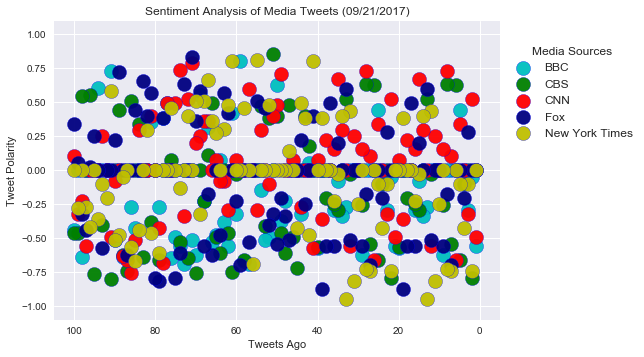

In [12]:
# Plot title and lables
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')

plt.savefig("Images/Sentiment Analysis of Media Tweets.png", bbox_inches="tight")
plt.show()

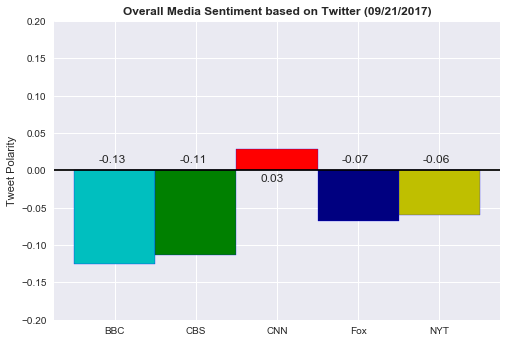

In [13]:
# Create bar chart
plt.bar(0, bbc['Compound Score'].mean(), color='c', edgecolor='b', width=1)
plt.bar(1, cbs['Compound Score'].mean(), color='g', edgecolor='b', width=1)
plt.bar(2, cnn['Compound Score'].mean(), color='r', edgecolor='b', width=1)
plt.bar(3, fox['Compound Score'].mean(), color='navy', edgecolor='b', width=1)
plt.bar(4, nyt['Compound Score'].mean(), color='y', edgecolor='b', width=1)

plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),
                                                                           fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

for a,b in zip(np.arange(5), [bbc['Compound Score'].mean(),cbs['Compound Score'].mean(), 
                              cnn['Compound Score'].mean(),
                             fox['Compound Score'].mean(),nyt['Compound Score'].mean()]):
    if b > 0:
        plt.text(a-0.2,b-b-0.015,str(round(b,2)))
    else:
        plt.text(a-0.2,b-b+0.01,str(round(b,2)))             
        
        
  
plt.savefig("Images/Overall Media Sentiment.png")
plt.show()